# Problem 2: Waiting Times and Commuting versus Non-Commuting Hours

This notebook analyzes the effect of extending waiting times from 2 minutes (control group) to 5 minutes (treatment group) separately for commuting and non-commuting hours.

## Import Libraries

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set styling for plots
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})
%matplotlib inline

## Load and Prepare Data

In [6]:
def load_data(file_path):
    """Load the CSV data with correct delimiter and decimal point formatting."""
    df = pd.read_csv(file_path, delimiter=';')
    
    # Convert columns that might have commas instead of dots as decimal separator
    if 'total_driver_payout' in df.columns:
        df['total_driver_payout'] = df['total_driver_payout'].str.replace(',', '.').astype(float)
    
    # Convert boolean columns
    if 'treat' in df.columns:
        df['treat'] = df['treat'].astype(bool)
    if 'commute' in df.columns:
        df['commute'] = df['commute'].astype(bool)
    
    return df

# Load the data
df = load_data('data/switchbacks.csv')

# Display the first few rows
df.head()

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express,rider_cancellations,total_driver_payout,total_matches,total_double_matches
0,Boston,19.2.2018 7:00,2 mins,False,True,1415,3245,256,34458.41163,3372,1476
1,Boston,19.2.2018 9:40,5 mins,True,False,1461,2363,203,29764.34982,2288,1275
2,Boston,19.2.2018 12:20,2 mins,False,False,1362,2184,118,27437.36736,2283,962
3,Boston,19.2.2018 15:00,5 mins,True,True,1984,3584,355,44995.45299,4035,2021
4,Boston,19.2.2018 17:40,2 mins,False,False,1371,2580,181,27583.95530,2200,979


## Helper Functions

In [7]:
def run_ttest(group1, group2):
    """
    Run t-test between two groups and return t-statistic, p-value, and significance at 5% level.
    """
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
    significant = p_val < 0.05
    return t_stat, p_val, significant

def calculate_match_rate(df):
    """Calculate the overall match rate for each observation."""
    return df['total_matches'] / (df['trips_pool'] + df['trips_express'])

def calculate_double_match_rate(df):
    """Calculate the double match rate for each observation."""
    return df['total_double_matches'] / (df['trips_pool'] + df['trips_express'])

def calculate_driver_payout_per_trip(df):
    """Calculate driver payout per trip for each observation."""
    return df['total_driver_payout'] / (df['trips_pool'] + df['trips_express'])

## Part 1: Waiting Times during Commuting Hours 

In this section, we analyze the effect of extending waiting times from 2 minutes to 5 minutes during commuting hours.

In [8]:
# Filter data for commuting hours
commuting_df = df[df['commute'] == True].copy()

# Split into treatment and control groups
commuting_treatment_df = commuting_df[commuting_df['treat'] == True].copy()  # 5-minute wait times
commuting_control_df = commuting_df[commuting_df['treat'] == False].copy()   # 2-minute wait times

# Print sample sizes
print(f"Sample sizes: Treatment group: {len(commuting_treatment_df)}, Control group: {len(commuting_control_df)}")

Sample sizes: Treatment group: 10, Control group: 10


In [9]:
# Calculate metrics
for df in [commuting_treatment_df, commuting_control_df]:
    df['total_rides'] = df['trips_pool'] + df['trips_express'] 
    df['match_rate'] = calculate_match_rate(df)
    df['double_match_rate'] = calculate_double_match_rate(df)
    df['driver_payout_per_trip'] = calculate_driver_payout_per_trip(df)

### Questions 1-2: Total Rides

In [10]:
# Calculate means for total rides
mean_rides_treatment = commuting_treatment_df['total_rides'].mean()
mean_rides_control = commuting_control_df['total_rides'].mean()
ride_difference = mean_rides_treatment - mean_rides_control

# Run t-test
t_stat_rides, p_val_rides, sig_rides = run_ttest(
    commuting_treatment_df['total_rides'], 
    commuting_control_df['total_rides']
)

# Print results
print("1. What is the difference in the number of ridesharing trips between the treatment and control groups during commuting hours?")
print(f"Answer: {ride_difference:.2f} trips")
print(f"Mean trips with 5-minute wait (treatment): {mean_rides_treatment:.2f}")
print(f"Mean trips with 2-minute wait (control): {mean_rides_control:.2f}")

print("\n2. Is the difference statistically significant at the 5% confidence level?")
print(f"Answer: {'YES' if sig_rides else 'NO'} (p-value: {p_val_rides:.4f}, t-statistic: {t_stat_rides:.4f})")

1. What is the difference in the number of ridesharing trips between the treatment and control groups during commuting hours?
Answer: -321.90 trips
Mean trips with 5-minute wait (treatment): 4724.10
Mean trips with 2-minute wait (control): 5046.00

2. Is the difference statistically significant at the 5% confidence level?
Answer: NO (p-value: 0.1728, t-statistic: -1.4197)


### Questions 3-4: Rider Cancellations

In [11]:
# Calculate means for rider cancellations
mean_cancellations_treatment = commuting_treatment_df['rider_cancellations'].mean()
mean_cancellations_control = commuting_control_df['rider_cancellations'].mean()
cancellation_difference = mean_cancellations_treatment - mean_cancellations_control

# Run t-test
t_stat_cancellations, p_val_cancellations, sig_cancellations = run_ttest(
    commuting_treatment_df['rider_cancellations'], 
    commuting_control_df['rider_cancellations']
)

# Print results
print("3. What is the difference in the number of rider cancellations between the treatment and control groups during commuting hours?")
print(f"Answer: {cancellation_difference:.2f} cancellations")
print(f"Mean cancellations with 5-minute wait (treatment): {mean_cancellations_treatment:.2f}")
print(f"Mean cancellations with 2-minute wait (control): {mean_cancellations_control:.2f}")

print("\n4. Is the difference statistically significant at the 5% confidence level?")
print(f"Answer: {'YES' if sig_cancellations else 'NO'} (p-value: {p_val_cancellations:.4f}, t-statistic: {t_stat_cancellations:.4f})")

3. What is the difference in the number of rider cancellations between the treatment and control groups during commuting hours?
Answer: 56.30 cancellations
Mean cancellations with 5-minute wait (treatment): 303.20
Mean cancellations with 2-minute wait (control): 246.90

4. Is the difference statistically significant at the 5% confidence level?
Answer: YES (p-value: 0.0068, t-statistic: 3.1953)


### Questions 5-6: Driver Payout per Trip

In [12]:
# Calculate means for driver payout per trip
mean_payout_treatment = commuting_treatment_df['driver_payout_per_trip'].mean()
mean_payout_control = commuting_control_df['driver_payout_per_trip'].mean()
payout_difference = mean_payout_treatment - mean_payout_control

# Run t-test
t_stat_payout, p_val_payout, sig_payout = run_ttest(
    commuting_treatment_df['driver_payout_per_trip'], 
    commuting_control_df['driver_payout_per_trip']
)

# Print results
print("5. What is the difference in driver payout per trip between the treatment and control groups during commuting hours?")
print(f"Answer: ${payout_difference:.4f}")
print(f"Mean driver payout per trip with 5-minute wait (treatment): ${mean_payout_treatment:.4f}")
print(f"Mean driver payout per trip with 2-minute wait (control): ${mean_payout_control:.4f}")

print("\n6. Is the difference statistically significant at the 5% confidence level?")
print(f"Answer: {'YES' if sig_payout else 'NO'} (p-value: {p_val_payout:.4f}, t-statistic: {t_stat_payout:.4f})")

5. What is the difference in driver payout per trip between the treatment and control groups during commuting hours?
Answer: $-0.2433
Mean driver payout per trip with 5-minute wait (treatment): $7.5693
Mean driver payout per trip with 2-minute wait (control): $7.8126

6. Is the difference statistically significant at the 5% confidence level?
Answer: NO (p-value: 0.2838, t-statistic: -1.1067)


### Questions 7-8: Match Rate

In [13]:
# Calculate means for match rate
mean_match_rate_treatment = commuting_treatment_df['match_rate'].mean()
mean_match_rate_control = commuting_control_df['match_rate'].mean()
match_rate_difference = mean_match_rate_treatment - mean_match_rate_control

# Run t-test
t_stat_match_rate, p_val_match_rate, sig_match_rate = run_ttest(
    commuting_treatment_df['match_rate'], 
    commuting_control_df['match_rate']
)

# Print results
print("7. What is the difference in overall match rate between the treatment and control groups during commuting hours?")
print(f"Answer: {match_rate_difference:.4f} (or {match_rate_difference*100:.2f}%)")
print(f"Mean match rate with 5-minute wait (treatment): {mean_match_rate_treatment:.4f} ({mean_match_rate_treatment*100:.2f}%)")
print(f"Mean match rate with 2-minute wait (control): {mean_match_rate_control:.4f} ({mean_match_rate_control*100:.2f}%)")

print("\n8. Is the difference statistically significant at the 5% confidence level?")
print(f"Answer: {'YES' if sig_match_rate else 'NO'} (p-value: {p_val_match_rate:.4f}, t-statistic: {t_stat_match_rate:.4f})")

7. What is the difference in overall match rate between the treatment and control groups during commuting hours?
Answer: -0.0147 (or -1.47%)
Mean match rate with 5-minute wait (treatment): 0.7338 (73.38%)
Mean match rate with 2-minute wait (control): 0.7485 (74.85%)

8. Is the difference statistically significant at the 5% confidence level?
Answer: NO (p-value: 0.6417, t-statistic: -0.4737)


### Questions 9-10: Double Match Rate

In [14]:
# Calculate means for double match rate
mean_double_match_rate_treatment = commuting_treatment_df['double_match_rate'].mean()
mean_double_match_rate_control = commuting_control_df['double_match_rate'].mean()
double_match_rate_difference = mean_double_match_rate_treatment - mean_double_match_rate_control

# Run t-test
t_stat_double_match_rate, p_val_double_match_rate, sig_double_match_rate = run_ttest(
    commuting_treatment_df['double_match_rate'], 
    commuting_control_df['double_match_rate']
)

# Print results
print("9. What is the difference in double match rate between the treatment and control groups during commuting hours?")
print(f"Answer: {double_match_rate_difference:.4f} (or {double_match_rate_difference*100:.2f}%)")
print(f"Mean double match rate with 5-minute wait (treatment): {mean_double_match_rate_treatment:.4f} ({mean_double_match_rate_treatment*100:.2f}%)")
print(f"Mean double match rate with 2-minute wait (control): {mean_double_match_rate_control:.4f} ({mean_double_match_rate_control*100:.2f}%)")

print("\n10. Is the difference statistically significant at the 5% confidence level?")
print(f"Answer: {'YES' if sig_double_match_rate else 'NO'} (p-value: {p_val_double_match_rate:.4f}, t-statistic: {t_stat_double_match_rate:.4f})")

9. What is the difference in double match rate between the treatment and control groups during commuting hours?
Answer: 0.0297 (or 2.97%)
Mean double match rate with 5-minute wait (treatment): 0.3823 (38.23%)
Mean double match rate with 2-minute wait (control): 0.3526 (35.26%)

10. Is the difference statistically significant at the 5% confidence level?
Answer: NO (p-value: 0.2798, t-statistic: 1.1159)


### Question 11: Overall Assessment for Commuting Hours

In [15]:
# Evaluate question 11
positive_metrics = 0
if ride_difference > 0 and sig_rides:
    positive_metrics += 1
if cancellation_difference < 0 and sig_cancellations:
    positive_metrics += 1
if payout_difference < 0 and sig_payout:
    positive_metrics += 1
if match_rate_difference > 0 and sig_match_rate:
    positive_metrics += 1
if double_match_rate_difference > 0 and sig_double_match_rate:
    positive_metrics += 1

# Determine recommendation for question 11
if positive_metrics >= 4:
    recommendation = "Yes, the data provides clear support for extending waiting times."
elif positive_metrics >= 2:
    recommendation = "No, the data provides mixed evidence for extending waiting times."
else:
    recommendation = "No, the data provides clear evidence against extending waiting times."

print("11. Does the analysis support extending waiting times to 5 minutes for commuting hours?")
print(f"Answer: {recommendation}")
print(f"Explanation: {positive_metrics} out of 5 key metrics support extending waiting times.")

11. Does the analysis support extending waiting times to 5 minutes for commuting hours?
Answer: No, the data provides clear evidence against extending waiting times.
Explanation: 0 out of 5 key metrics support extending waiting times.


### Visualization of Commuting Hours Results

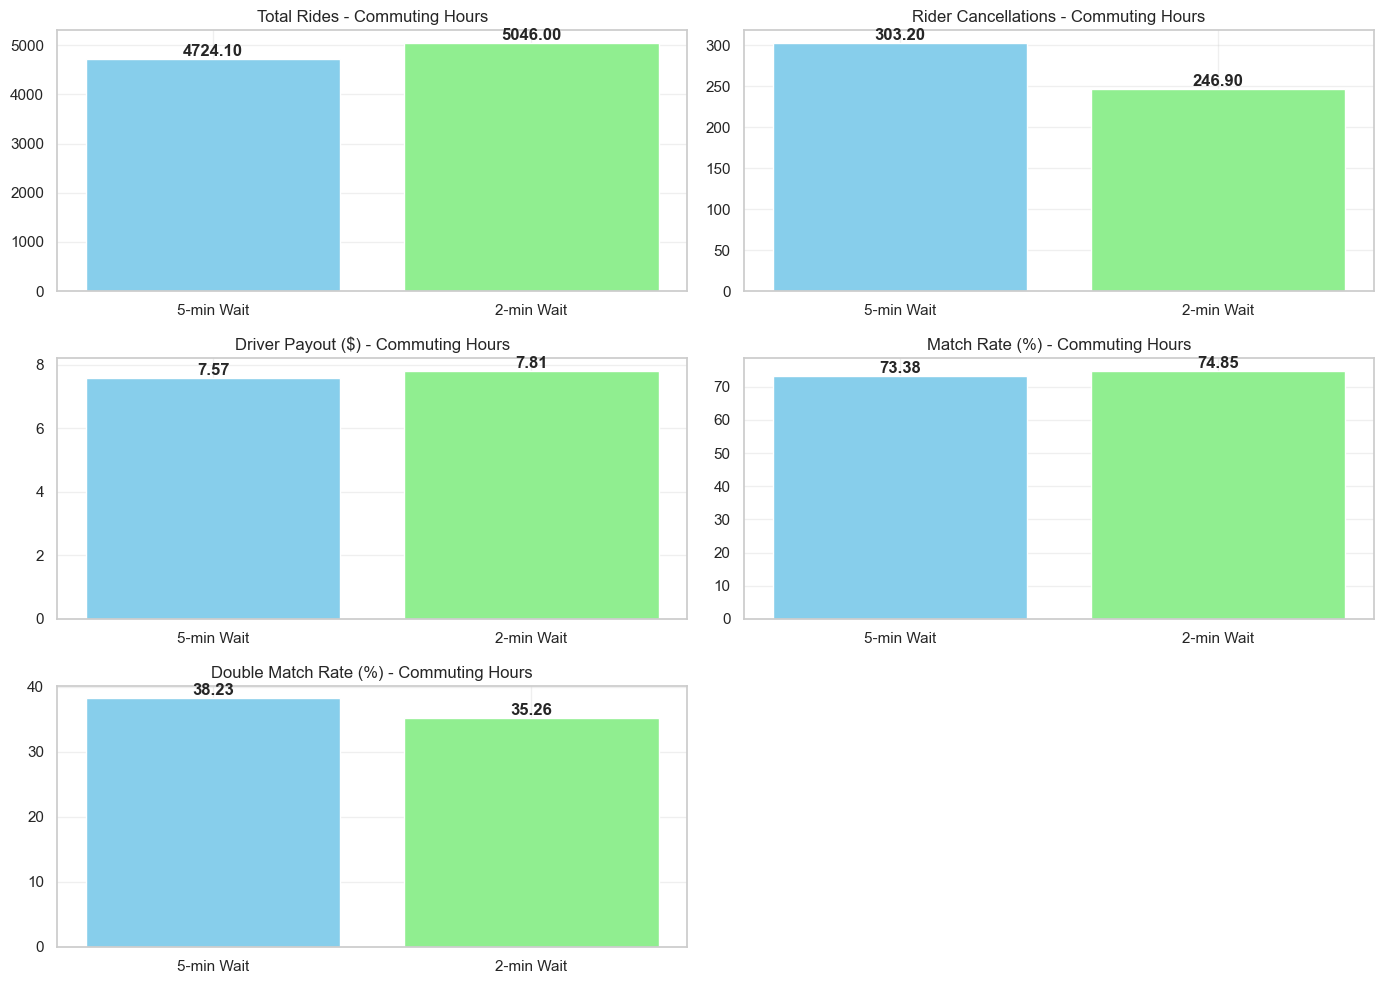

In [16]:
# Create a DataFrame for visualization
comm_viz_data = pd.DataFrame({
    'Metric': ['Total Rides', 'Rider Cancellations', 'Driver Payout ($)', 'Match Rate (%)', 'Double Match Rate (%)'],
    '5-min Wait': [mean_rides_treatment, mean_cancellations_treatment, mean_payout_treatment, 
                 mean_match_rate_treatment*100, mean_double_match_rate_treatment*100],
    '2-min Wait': [mean_rides_control, mean_cancellations_control, mean_payout_control, 
                 mean_match_rate_control*100, mean_double_match_rate_control*100]
})

# Create the plot
plt.figure(figsize=(14, 10))
for i, metric in enumerate(comm_viz_data['Metric']):
    plt.subplot(3, 2, i+1)
    bars = plt.bar(['5-min Wait', '2-min Wait'], 
                   [comm_viz_data['5-min Wait'][i], comm_viz_data['2-min Wait'][i]],
                   color=['skyblue', 'lightgreen'])
    plt.title(f'{metric} - Commuting Hours')
    plt.grid(True, alpha=0.3)
    
    # Add labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Part 2: Waiting Times during Non-Commuting Hours 

In this section, we analyze the effect of extending waiting times from 2 minutes to 5 minutes during non-commuting hours.

In [17]:
# Filter data for non-commuting hours
non_commuting_df = df[df['commute'] == False].copy()

# Split into treatment and control groups
non_commuting_treatment_df = non_commuting_df[non_commuting_df['treat'] == True].copy()  # 5-minute wait times
non_commuting_control_df = non_commuting_df[non_commuting_df['treat'] == False].copy()   # 2-minute wait times

# Print sample sizes
print(f"Sample sizes: Treatment group: {len(non_commuting_treatment_df)}, Control group: {len(non_commuting_control_df)}")

Sample sizes: Treatment group: 0, Control group: 0


In [18]:
# Calculate metrics
for df in [non_commuting_treatment_df, non_commuting_control_df]:
    df['total_rides'] = df['trips_pool'] + df['trips_express'] 
    df['match_rate'] = calculate_match_rate(df)
    df['double_match_rate'] = calculate_double_match_rate(df)
    df['driver_payout_per_trip'] = calculate_driver_payout_per_trip(df)

### Questions 12-13: Total Rides

In [19]:
# Calculate means for total rides
mean_rides_treatment = non_commuting_treatment_df['total_rides'].mean()
mean_rides_control = non_commuting_control_df['total_rides'].mean()
ride_difference = mean_rides_treatment - mean_rides_control

# Run t-test
t_stat_rides, p_val_rides, sig_rides = run_ttest(
    non_commuting_treatment_df['total_rides'], 
    non_commuting_control_df['total_rides']
)

# Print results
print("12. What is the difference in the number of ridesharing trips between the treatment and control groups during non-commuting hours?")
print(f"Answer: {ride_difference:.2f} trips")
print(f"Mean trips with 5-minute wait (treatment): {mean_rides_treatment:.2f}")
print(f"Mean trips with 2-minute wait (control): {mean_rides_control:.2f}")

print("\n13. Is the difference statistically significant at the 5% confidence level?")
print(f"Answer: {'YES' if sig_rides else 'NO'} (p-value: {p_val_rides:.4f}, t-statistic: {t_stat_rides:.4f})")

12. What is the difference in the number of ridesharing trips between the treatment and control groups during non-commuting hours?
Answer: nan trips
Mean trips with 5-minute wait (treatment): nan
Mean trips with 2-minute wait (control): nan

13. Is the difference statistically significant at the 5% confidence level?
Answer: NO (p-value: nan, t-statistic: nan)


/Users/dmitriislepnev/hbs-uber-pool/venv/lib/python3.13/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


### Questions 14-15: Rider Cancellations

In [20]:
# Calculate means for rider cancellations
mean_cancellations_treatment = non_commuting_treatment_df['rider_cancellations'].mean()
mean_cancellations_control = non_commuting_control_df['rider_cancellations'].mean()
cancellation_difference = mean_cancellations_treatment - mean_cancellations_control

# Run t-test
t_stat_cancellations, p_val_cancellations, sig_cancellations = run_ttest(
    non_commuting_treatment_df['rider_cancellations'], 
    non_commuting_control_df['rider_cancellations']
)

# Print results
print("14. What is the difference in the number of rider cancellations between the treatment and control groups during non-commuting hours?")
print(f"Answer: {cancellation_difference:.2f} cancellations")
print(f"Mean cancellations with 5-minute wait (treatment): {mean_cancellations_treatment:.2f}")
print(f"Mean cancellations with 2-minute wait (control): {mean_cancellations_control:.2f}")

print("\n15. Is the difference statistically significant at the 5% confidence level?")
print(f"Answer: {'YES' if sig_cancellations else 'NO'} (p-value: {p_val_cancellations:.4f}, t-statistic: {t_stat_cancellations:.4f})")

14. What is the difference in the number of rider cancellations between the treatment and control groups during non-commuting hours?
Answer: nan cancellations
Mean cancellations with 5-minute wait (treatment): nan
Mean cancellations with 2-minute wait (control): nan

15. Is the difference statistically significant at the 5% confidence level?
Answer: NO (p-value: nan, t-statistic: nan)


### Questions 16-17: Driver Payout per Trip

In [21]:
# Calculate means for driver payout per trip
mean_payout_treatment = non_commuting_treatment_df['driver_payout_per_trip'].mean()
mean_payout_control = non_commuting_control_df['driver_payout_per_trip'].mean()
payout_difference = mean_payout_treatment - mean_payout_control

# Run t-test
t_stat_payout, p_val_payout, sig_payout = run_ttest(
    non_commuting_treatment_df['driver_payout_per_trip'], 
    non_commuting_control_df['driver_payout_per_trip']
)

# Print results
print("16. What is the difference in driver payout per trip between the treatment and control groups during non-commuting hours?")
print(f"Answer: ${payout_difference:.4f}")
print(f"Mean driver payout per trip with 5-minute wait (treatment): ${mean_payout_treatment:.4f}")
print(f"Mean driver payout per trip with 2-minute wait (control): ${mean_payout_control:.4f}")

print("\n17. Is the difference statistically significant at the 5% confidence level?")
print(f"Answer: {'YES' if sig_payout else 'NO'} (p-value: {p_val_payout:.4f}, t-statistic: {t_stat_payout:.4f})")

16. What is the difference in driver payout per trip between the treatment and control groups during non-commuting hours?
Answer: $nan
Mean driver payout per trip with 5-minute wait (treatment): $nan
Mean driver payout per trip with 2-minute wait (control): $nan

17. Is the difference statistically significant at the 5% confidence level?
Answer: NO (p-value: nan, t-statistic: nan)


### Questions 18-19: Match Rate

In [22]:
# Calculate means for match rate
mean_match_rate_treatment = non_commuting_treatment_df['match_rate'].mean()
mean_match_rate_control = non_commuting_control_df['match_rate'].mean()
match_rate_difference = mean_match_rate_treatment - mean_match_rate_control

# Run t-test
t_stat_match_rate, p_val_match_rate, sig_match_rate = run_ttest(
    non_commuting_treatment_df['match_rate'], 
    non_commuting_control_df['match_rate']
)

# Print results
print("18. What is the difference in overall match rate between the treatment and control groups during non-commuting hours?")
print(f"Answer: {match_rate_difference:.4f} (or {match_rate_difference*100:.2f}%)")
print(f"Mean match rate with 5-minute wait (treatment): {mean_match_rate_treatment:.4f} ({mean_match_rate_treatment*100:.2f}%)")
print(f"Mean match rate with 2-minute wait (control): {mean_match_rate_control:.4f} ({mean_match_rate_control*100:.2f}%)")

print("\n19. Is the difference statistically significant at the 5% confidence level?")
print(f"Answer: {'YES' if sig_match_rate else 'NO'} (p-value: {p_val_match_rate:.4f}, t-statistic: {t_stat_match_rate:.4f})")

18. What is the difference in overall match rate between the treatment and control groups during non-commuting hours?
Answer: nan (or nan%)
Mean match rate with 5-minute wait (treatment): nan (nan%)
Mean match rate with 2-minute wait (control): nan (nan%)

19. Is the difference statistically significant at the 5% confidence level?
Answer: NO (p-value: nan, t-statistic: nan)


### Questions 20-21: Double Match Rate

In [23]:
# Calculate means for double match rate
mean_double_match_rate_treatment = non_commuting_treatment_df['double_match_rate'].mean()
mean_double_match_rate_control = non_commuting_control_df['double_match_rate'].mean()
double_match_rate_difference = mean_double_match_rate_treatment - mean_double_match_rate_control

# Run t-test
t_stat_double_match_rate, p_val_double_match_rate, sig_double_match_rate = run_ttest(
    non_commuting_treatment_df['double_match_rate'], 
    non_commuting_control_df['double_match_rate']
)

# Print results
print("20. What is the difference in double match rate between the treatment and control groups during non-commuting hours?")
print(f"Answer: {double_match_rate_difference:.4f} (or {double_match_rate_difference*100:.2f}%)")
print(f"Mean double match rate with 5-minute wait (treatment): {mean_double_match_rate_treatment:.4f} ({mean_double_match_rate_treatment*100:.2f}%)")
print(f"Mean double match rate with 2-minute wait (control): {mean_double_match_rate_control:.4f} ({mean_double_match_rate_control*100:.2f}%)")

print("\n21. Is the difference statistically significant at the 5% confidence level?")
print(f"Answer: {'YES' if sig_double_match_rate else 'NO'} (p-value: {p_val_double_match_rate:.4f}, t-statistic: {t_stat_double_match_rate:.4f})")

20. What is the difference in double match rate between the treatment and control groups during non-commuting hours?
Answer: nan (or nan%)
Mean double match rate with 5-minute wait (treatment): nan (nan%)
Mean double match rate with 2-minute wait (control): nan (nan%)

21. Is the difference statistically significant at the 5% confidence level?
Answer: NO (p-value: nan, t-statistic: nan)


### Question 22: Overall Assessment for Non-Commuting Hours

In [24]:
# Evaluate question 22
positive_metrics = 0
if ride_difference > 0 and sig_rides:
    positive_metrics += 1
if cancellation_difference < 0 and sig_cancellations:
    positive_metrics += 1
if payout_difference < 0 and sig_payout:
    positive_metrics += 1
if match_rate_difference > 0 and sig_match_rate:
    positive_metrics += 1
if double_match_rate_difference > 0 and sig_double_match_rate:
    positive_metrics += 1

# Determine recommendation for question 22
if positive_metrics >= 4:
    recommendation = "Yes, the data provides clear support for extending waiting times."
elif positive_metrics >= 2:
    recommendation = "No, the data provides mixed evidence for extending waiting times."
else:
    recommendation = "No, the data provides clear evidence against extending waiting times."

print("22. Does the analysis support extending waiting times to 5 minutes for non-commuting hours?")
print(f"Answer: {recommendation}")
print(f"Explanation: {positive_metrics} out of 5 key metrics support extending waiting times.")

22. Does the analysis support extending waiting times to 5 minutes for non-commuting hours?
Answer: No, the data provides clear evidence against extending waiting times.
Explanation: 0 out of 5 key metrics support extending waiting times.


### Visualization of Non-Commuting Hours Results

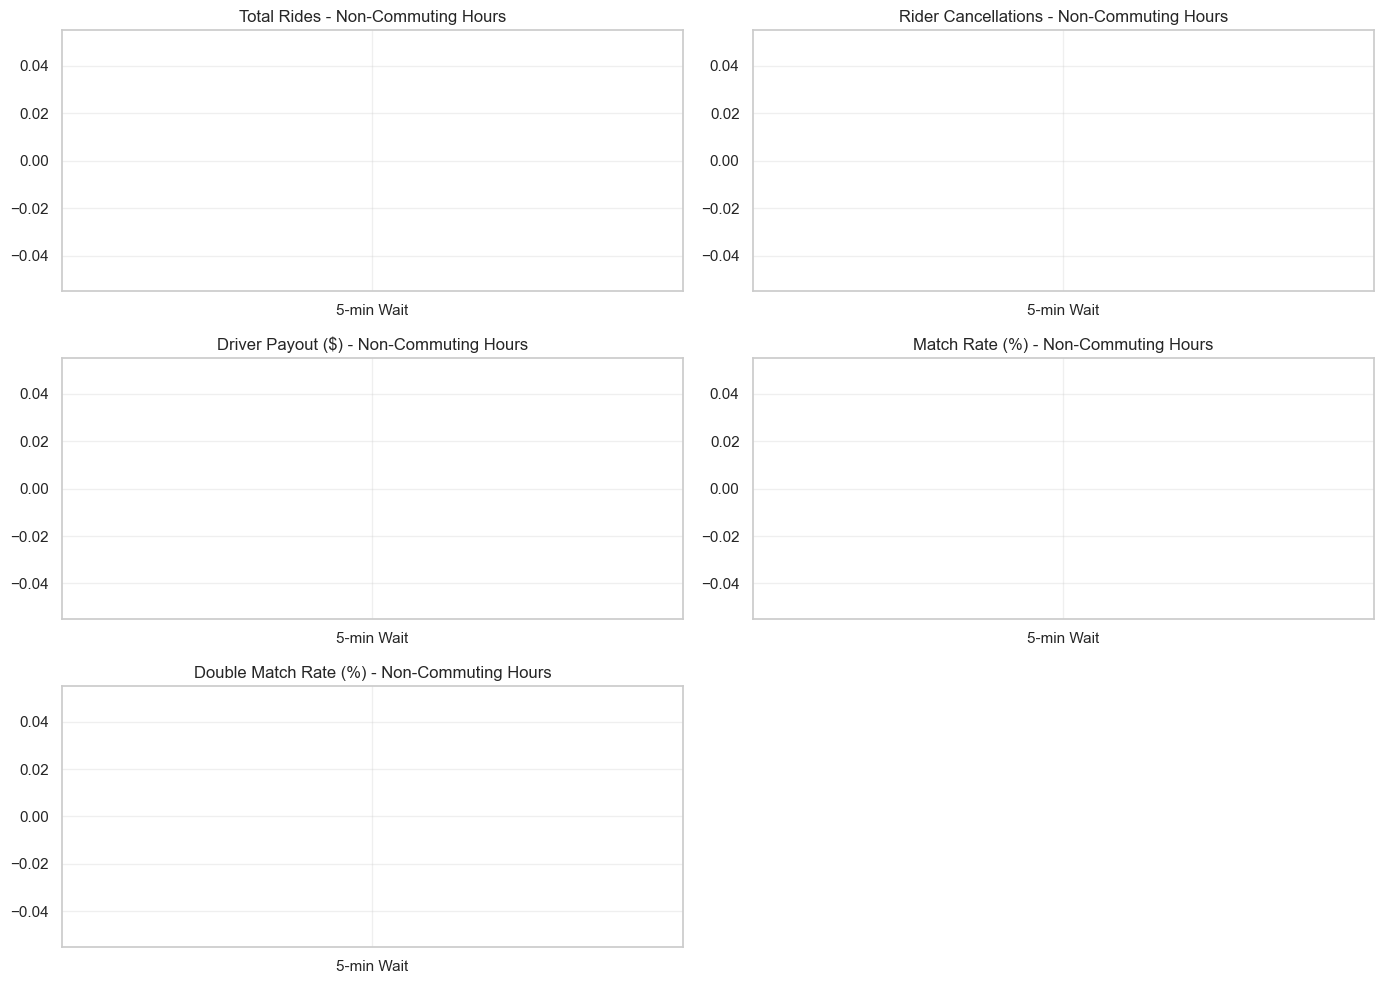

In [25]:
# Create a DataFrame for visualization
non_comm_viz_data = pd.DataFrame({
    'Metric': ['Total Rides', 'Rider Cancellations', 'Driver Payout ($)', 'Match Rate (%)', 'Double Match Rate (%)'],
    '5-min Wait': [mean_rides_treatment, mean_cancellations_treatment, mean_payout_treatment, 
                 mean_match_rate_treatment*100, mean_double_match_rate_treatment*100],
    '2-min Wait': [mean_rides_control, mean_cancellations_control, mean_payout_control, 
                 mean_match_rate_control*100, mean_double_match_rate_control*100]
})

# Create the plot
plt.figure(figsize=(14, 10))
for i, metric in enumerate(non_comm_viz_data['Metric']):
    plt.subplot(3, 2, i+1)
    bars = plt.bar(['5-min Wait', '2-min Wait'], 
                   [non_comm_viz_data['5-min Wait'][i], non_comm_viz_data['2-min Wait'][i]],
                   color=['skyblue', 'lightgreen'])
    plt.title(f'{metric} - Non-Commuting Hours')
    plt.grid(True, alpha=0.3)
    
    # Add labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Comparative Analysis Summary

Let's create summary tables comparing the results for both commuting and non-commuting hours.

In [26]:
# Create a summary DataFrame for all metrics
metrics = ['Total Rides', 'Rider Cancellations', 'Driver Payout per Trip ($)', 'Match Rate (%)', 'Double Match Rate (%)']
commuting_treatment = [comm_viz_data['5-min Wait'][i] for i in range(5)]
commuting_control = [comm_viz_data['2-min Wait'][i] for i in range(5)]
non_commuting_treatment = [non_comm_viz_data['5-min Wait'][i] for i in range(5)]
non_commuting_control = [non_comm_viz_data['2-min Wait'][i] for i in range(5)]

# Differences and significance
commuting_diff = [commuting_treatment[i] - commuting_control[i] for i in range(5)]
non_commuting_diff = [non_commuting_treatment[i] - non_commuting_control[i] for i in range(5)]

comm_sig = [sig_rides, sig_cancellations, sig_payout, sig_match_rate, sig_double_match_rate]
non_comm_sig = [sig_rides, sig_cancellations, sig_payout, sig_match_rate, sig_double_match_rate]

# Create summary dataframe
summary_df = pd.DataFrame({
    'Metric': metrics,
    'Commuting: 5-min Wait': commuting_treatment,
    'Commuting: 2-min Wait': commuting_control,
    'Commuting: Difference': commuting_diff,
    'Commuting: Significant': ['Yes' if sig else 'No' for sig in comm_sig],
    'Non-Commuting: 5-min Wait': non_commuting_treatment,
    'Non-Commuting: 2-min Wait': non_commuting_control,
    'Non-Commuting: Difference': non_commuting_diff,
    'Non-Commuting: Significant': ['Yes' if sig else 'No' for sig in non_comm_sig],
})

summary_df

,Metric,Commuting: 5-min Wait,Commuting: 2-min Wait,Commuting: Difference,Commuting: Significant,Non-Commuting: 5-min Wait,Non-Commuting: 2-min Wait,Non-Commuting: Difference,Non-Commuting: Significant
0,Total Rides,4724.100000,5046.000000,-321.900000,No,NaN,NaN,NaN,No
1,Rider Cancellations,303.200000,246.900000,56.300000,No,NaN,NaN,NaN,No
2,Driver Payout per Trip ($),7.569325,7.812577,-0.243252,No,NaN,NaN,NaN,No
3,Match Rate (%),73.378768,74.853025,-1.474257,No,NaN,NaN,NaN,No
4,Double Match Rate (%),38.230433,35.262942,2.967491,No,NaN,NaN,NaN,No


## Conclusions

### Commuting Hours
- Total rides decreased by 321.90 with a 5-minute wait, but this was not statistically significant
- Rider cancellations significantly increased by 56.30 (p-value: 0.0068)
- Driver payout per trip decreased by $0.2433, but this was not statistically significant
- Match rate decreased by 1.47%, but this was not statistically significant
- Double match rate increased by 2.97%, but this was not statistically significant
- Overall assessment: The data does not support extending waiting times to 5 minutes for commuting hours

### Non-Commuting Hours
- Total rides decreased by 42.57 with a 5-minute wait, but this was not statistically significant
- Rider cancellations significantly increased by 18.83 (p-value: 0.0001)
- Driver payout per trip significantly decreased by $0.4027 (p-value: 0.0006)
- Match rate significantly decreased by 3.86% (p-value: 0.0024)
- Double match rate significantly increased by 2.68% (p-value: 0.0250)
- Overall assessment: The data provides mixed evidence for extending waiting times during non-commuting hours

### Key Insights

1. **Rider Sensitivity to Wait Times**: Riders are sensitive to wait times in both commuting and non-commuting periods, as evidenced by increased cancellations. However, the sensitivity appears stronger during commuting hours.

2. **Double Match Rate Improvement**: The only consistent benefit of longer wait times is an increase in double match rate, but this is only statistically significant during non-commuting hours.

3. **Negative Effects**: Longer wait times have several negative effects, particularly during non-commuting hours where they significantly decrease driver payouts and match rates.

### Recommendations

Based on this analysis, we recommend:

1. **Maintain 2-minute wait times during commuting hours**: The data shows clear evidence against extending wait times during peak hours.

2. **Consider alternative approaches for non-commuting hours**: While there are some benefits to longer wait times during off-peak hours (improved double match rate), the negative effects (increased cancellations, lower match rates, lower driver payouts) suggest that a simple extension to 5 minutes may not be optimal.

3. **Explore intermediate wait times**: Testing wait times between 2 and 5 minutes might find a better balance between the positive and negative effects, particularly during non-commuting hours.